<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Rolling-Statistics" data-toc-modified-id="Rolling-Statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rolling Statistics</a></span></li><li><span><a href="#Dickey-Fuller-Test" data-toc-modified-id="Dickey-Fuller-Test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dickey-Fuller Test</a></span></li><li><span><a href="#Level-up---Optional" data-toc-modified-id="Level-up---Optional-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level up - Optional</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


Import `passengers.csv` and view the head.

In [2]:
# Read the dataset 'passengers.csv' and view the head
df = pd.read_csv('passengers.csv')
df.head()
# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [3]:
# Set month column as a timeseries object, and make it the index
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# check the head and the new index
df.index

# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use the `plot()` function in pandas to visually inspect this time-series.

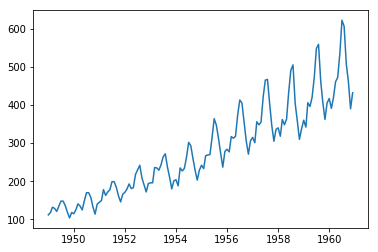

In [5]:
# Plot the time series data 
plt.plot(df)

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and the 
**Dickey-Fuller Test**.

## Rolling Statistics 

Use the `.rolling()` function to find the rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [18]:
#Determine rolling statistics
rol_object = df.rolling(12)

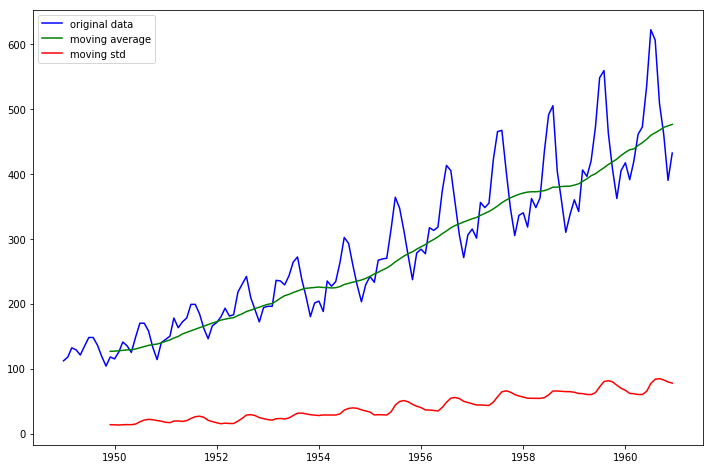

In [19]:
#Plot rolling statistics
fig = plt.figure(figsize=(12,8))
orig = plt.plot(df, c='b', label = 'original data')
moving_mean = plt.plot(rol_object.mean(), c='g', label = 'moving average')
moving_std = plt.plot(rol_object.std(), c='r', label = 'moving std')
plt.legend();

Though the variation in standard deviation is small, the mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [31]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['#Passengers'])
# Extract and display test results in a user friendly manner

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')
print(dfoutput)

#Perform Dickey-Fuller test:

# Extract and display test results in a user friendly manner

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

(0.8153688792060543, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

## Summary

In this lab, you learned to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!